# Introduction

The purpose of this task is to see the effect of ChatGPT on some of the subreddits. Specifically, subreddits that engage in answering queries posted by other users to help them in their work, for example - in r/excel, users can get help regarding the excel software. Our purpose is to check if the introduction of ChatGPT had any effect on the engagement level of the subreddit.

We will be using pushshift.io for this project, which is a third party service to retrieve reddit data.

# Setting up API

In [1]:
import requests
import json

response = requests.get('https://api.pushshift.io/reddit/search/submission/',
                       params = {'subreddit': 'excel', 'size': 100})
status = response.status_code
print(status)

200


We have got a response code of 200 which means the API is working.

# Defining a function to extract data from reddit

We will now be defining a function that will extract us the date and time of the posts submitted on a subreddit.

In [2]:
import datetime
import csv
import time

def get_reddit_posts(subreddit, size=10, before=None, csv_file=None):
    
    posts = []

    for i in range(9):
        params = {'subreddit': subreddit, 'size': size}
        if before:
            params['before'] = before
        response = requests.get('https://api.pushshift.io/reddit/search/submission/', params=params)
        data = response.json()
        
        for post in data['data']:
            created_at_unix = post['created_utc']
            created_at_utc = datetime.datetime.utcfromtimestamp(created_at_unix)
            posts.append([created_at_utc])
        
        before = data['data'][-1]['created_utc']
        time.sleep(1)
        
    with open(r'C:\Users\nbnav\OneDrive\Desktop\Dataquest\{}.csv'.format(csv_file), mode='a', newline='') as file:
        writer = csv.writer(file)
        if file.tell() == 0:
            writer.writerow(['Created_at'])
        writer.writerows(posts)
    
    return before

        

# Extracting information on 'Excel' subreddit

In [3]:
get_reddit_posts(subreddit='excel', size=10, before=None, csv_file='excel_posts')

1682348861

We successfully retrieved the timestamp of first 90 posts(10 * 9). Now we can increase the size limit to retrieve more posts and change the 'before' parameter manually(to have more control on how many posts we retrieve in a specific period to avoid rate limits)

In [3]:
get_reddit_posts(subreddit='excel', size=100, before=1682348861, csv_file='excel_posts')

1681686048

In [3]:
get_reddit_posts(subreddit='excel', size=100, before=1681686048, csv_file='excel_posts')

1680828072

In [4]:
get_reddit_posts(subreddit='excel', size=100, before=1680828072, csv_file='excel_posts')

1680205583

In [5]:
get_reddit_posts(subreddit='excel', size=100, before=1680205583, csv_file='excel_posts')

1679589398

In [3]:
get_reddit_posts(subreddit='excel', size=100, before=1679589398, csv_file='excel_posts')

1679006297

In [4]:
get_reddit_posts(subreddit='excel', size=100, before=1679006297, csv_file='excel_posts')

1678388214

In [5]:
get_reddit_posts(subreddit='excel', size=100, before=1678388214, csv_file='excel_posts')

1677818702

In [6]:
get_reddit_posts(subreddit='excel', size=100, before=1677818702, csv_file='excel_posts')

1677212082

In [3]:
get_reddit_posts(subreddit='excel', size=100, before=1677212082, csv_file='excel_posts')

1676562309

Let's increase the size to 400 to get the results faster.

In [4]:
get_reddit_posts(subreddit='excel', size=400, before=1676562309, csv_file='excel_posts')

1674157695

In [5]:
get_reddit_posts(subreddit='excel', size=400, before=1674157695, csv_file='excel_posts')

1671431551

In [6]:
get_reddit_posts(subreddit='excel', size=400, before=1671431551, csv_file='excel_posts')

1669110697

In [7]:
get_reddit_posts(subreddit='excel', size=400, before=1669110697, csv_file='excel_posts')

1666863265

In [3]:
get_reddit_posts(subreddit='excel', size=400, before=1666863265, csv_file='excel_posts')

1664628005

In [4]:
get_reddit_posts(subreddit='excel', size=400, before=1664628005, csv_file='excel_posts')

1662338021

In [5]:
get_reddit_posts(subreddit='excel', size=400, before=1662338021, csv_file='excel_posts')

1659996638

In [6]:
get_reddit_posts(subreddit='excel', size=400, before=1659996638, csv_file='excel_posts')

1657637870

We have got all the data we need for the excel subreddit(around 9 months of data). We will now visualize it to see whether the launch of ChatGPT had any effect on the number of posts posted every day on the subreddit. 

# Visualizing the data

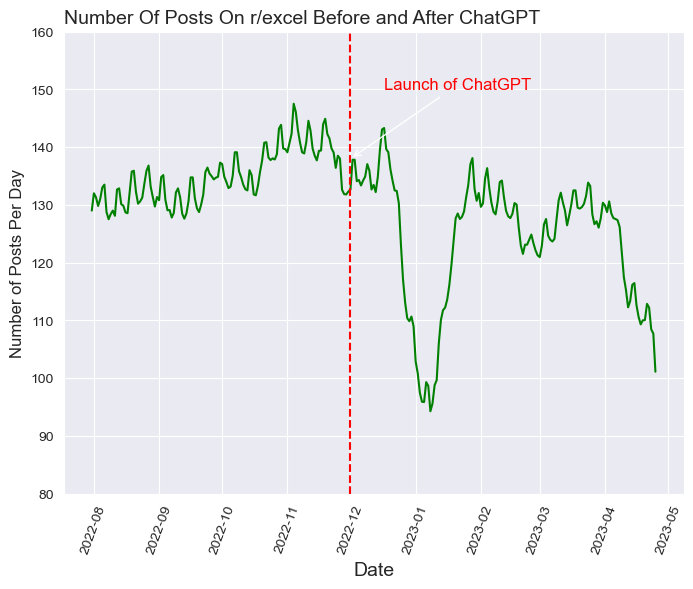

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

excel_data = pd.read_csv(r'C:\Users\nbnav\OneDrive\Desktop\Dataquest\excel_posts.csv')
excel_data['Created_at'] = pd.to_datetime(excel_data['Created_at'])
daily_counts = excel_data.groupby(pd.Grouper(key='Created_at', freq='D')).size().reset_index(name='counts')

rolling_counts = daily_counts['counts'].rolling(window=20).mean()
rolling_data = pd.DataFrame({'Created_at': daily_counts['Created_at'], 'rolling_counts': rolling_counts})

sns.set_style('darkgrid')

fig, ax = plt.subplots(figsize=(8, 6))

sns.lineplot(x='Created_at', y='rolling_counts', data=rolling_data, ax=ax, color='green')

# Set the y-axis limits
ax.set_ylim(80, 160)

ax.set_title('Number Of Posts On r/excel Before and After ChatGPT', loc='left', fontsize=14)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Number of Posts Per Day', fontsize =12)

plt.xticks(rotation=70)

date_str = '2022-12-01'
date = datetime.datetime.strptime(date_str, '%Y-%m-%d')
x_value = mdates.date2num(date)
ax.axvline(x=x_value, color='red', linestyle='--')

ax.annotate('Launch of ChatGPT', xy=(x_value, 138), xytext=(x_value + 16, 150),
            arrowprops=dict(facecolor='blue', arrowstyle='->'), color='red', fontsize=12)


plt.show()

# Data on r/learnpython

In [3]:
get_reddit_posts(subreddit='learnpython', size=400, before=None, csv_file='python_posts')

1678944750

In [4]:
get_reddit_posts(subreddit='learnpython', size=400, before=1678944750, csv_file='python_posts')

1675505653

In [5]:
get_reddit_posts(subreddit='learnpython', size=400, before=1675505653, csv_file='python_posts')

1672366205

In [6]:
get_reddit_posts(subreddit='learnpython', size=400, before=1672366205, csv_file='python_posts')

1669842592

In [7]:
get_reddit_posts(subreddit='learnpython', size=400, before=1669842592, csv_file='python_posts')

1667676721

In [8]:
get_reddit_posts(subreddit='learnpython', size=400, before=1667676721, csv_file='python_posts')

1665540224

In [9]:
get_reddit_posts(subreddit='learnpython', size=400, before=1665540224, csv_file='python_posts')

1663329078

In [10]:
get_reddit_posts(subreddit='learnpython', size=400, before=1663329078, csv_file='python_posts')

1660919321

In [11]:
get_reddit_posts(subreddit='learnpython', size=400, before=1660919321, csv_file='python_posts')

1658534087

# Visualizing the data

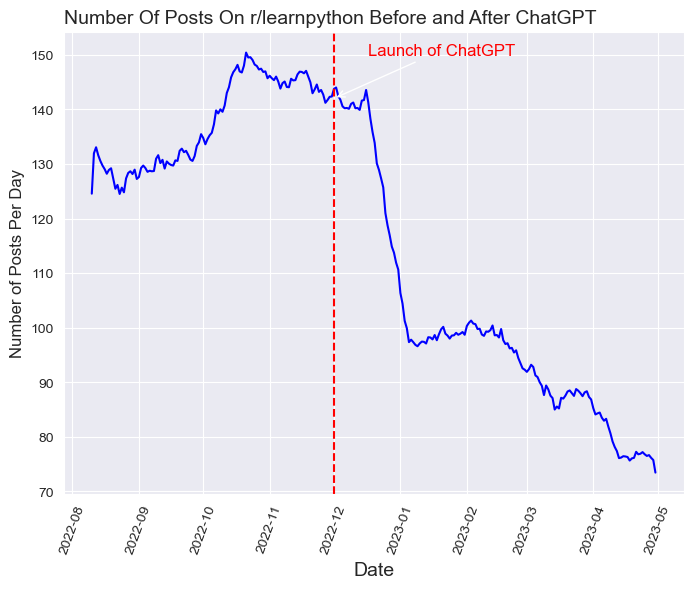

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

python_data = pd.read_csv(r'C:\Users\nbnav\OneDrive\Desktop\Dataquest\python_posts.csv')
python_data['Created_at'] = pd.to_datetime(python_data['Created_at'])
daily_counts = python_data.groupby(pd.Grouper(key='Created_at', freq='D')).size().reset_index(name='counts')

rolling_counts = daily_counts['counts'].rolling(window=20).mean()
rolling_data = pd.DataFrame({'Created_at': daily_counts['Created_at'], 'rolling_counts': rolling_counts})

sns.set_style('darkgrid')

fig, ax = plt.subplots(figsize=(8, 6))

sns.lineplot(x='Created_at', y='rolling_counts', data=rolling_data, ax=ax, color='blue')

# Set the y-axis limits

ax.set_title('Number Of Posts On r/learnpython Before and After ChatGPT', loc='left', fontsize=14)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Number of Posts Per Day', fontsize =12)

plt.xticks(rotation=70)

date_str = '2022-12-01'
date = datetime.datetime.strptime(date_str, '%Y-%m-%d')
x_value = mdates.date2num(date)
ax.axvline(x=x_value, color='red', linestyle='--')

ax.annotate('Launch of ChatGPT', xy=(x_value, 142), xytext=(x_value + 16, 150),
            arrowprops=dict(facecolor='blue', arrowstyle='->'), color='red', fontsize=12)


plt.show()

# Data on r/statistics

In [20]:
get_reddit_posts(subreddit='statistics', size=400, before=None, csv_file='statistics_posts')

1673092042

In [21]:
get_reddit_posts(subreddit='statistics', size=400, before=1673092042, csv_file='statistics_posts')

1664461738

In [22]:
get_reddit_posts(subreddit='statistics', size=400, before=1664461738, csv_file='statistics_posts')

1655279980

# Visualizing the data

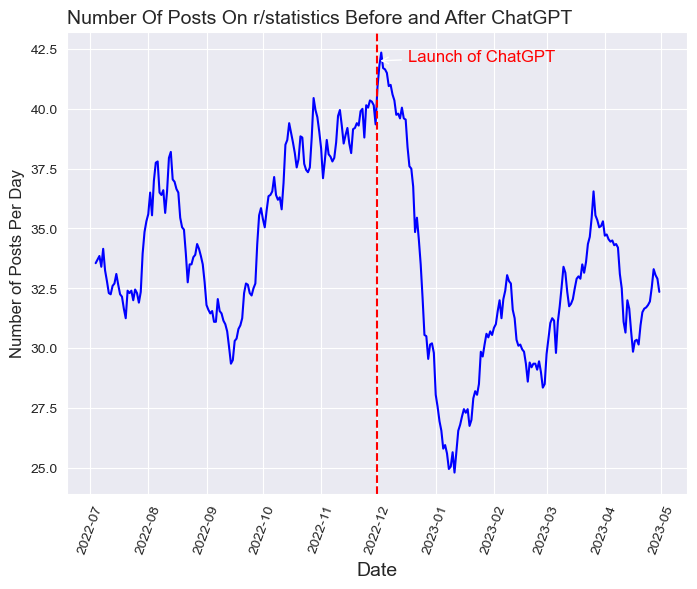

In [16]:
statistics_data = pd.read_csv(r'C:\Users\nbnav\OneDrive\Desktop\Dataquest\statistics_posts.csv')
statistics_data['Created_at'] = pd.to_datetime(statistics_data['Created_at'])
daily_counts = statistics_data.groupby(pd.Grouper(key='Created_at', freq='D')).size().reset_index(name='counts')

rolling_counts = daily_counts['counts'].rolling(window=20).mean()
rolling_data = pd.DataFrame({'Created_at': daily_counts['Created_at'], 'rolling_counts': rolling_counts})

sns.set_style('darkgrid')

fig, ax = plt.subplots(figsize=(8, 6))

sns.lineplot(x='Created_at', y='rolling_counts', data=rolling_data, ax=ax, color='blue')

# Set the y-axis limits

ax.set_title('Number Of Posts On r/statistics Before and After ChatGPT', loc='left', fontsize=14)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Number of Posts Per Day', fontsize =12)

plt.xticks(rotation=70)

date_str = '2022-12-01'
date = datetime.datetime.strptime(date_str, '%Y-%m-%d')
x_value = mdates.date2num(date)
ax.axvline(x=x_value, color='red', linestyle='--')

ax.annotate('Launch of ChatGPT', xy=(x_value, 42), xytext=(x_value + 16, 42),
            arrowprops=dict(facecolor='blue', arrowstyle='->'), color='red', fontsize=12)


plt.show()

# Data on r/legaladvice

In [27]:
get_reddit_posts(subreddit='legaladvice', size=400, before=None, csv_file='legaladvice_posts')

1682291835

In [28]:
get_reddit_posts(subreddit='legaladvice', size=400, before=1682291835, csv_file='legaladvice_posts')

1681746081

In [3]:
get_reddit_posts(subreddit='legaladvice', size=400, before=1681746081, csv_file='legaladvice_posts')

1681171558

Since the current subreddit has a lot of posts, it would make sense to automate the process since it would require us to call the function again and again.

In [7]:
def get_all_reddit_posts(subreddit, size, csv_file):
    before = None
    while True:
        try:
            # Call the function with the current value of `before`
            before = get_reddit_posts(subreddit, size, before, csv_file)

            # If we didn't get any more posts, we're done
            if before is None:
                break
        except Exception as e:
            print("An error occurred:", e)
            break
    return before

Let's try this function in a new csv file and see what happens!

In [8]:
get_all_reddit_posts(subreddit='legaladvice', size=400, csv_file='legaladvice2_posts')

KeyboardInterrupt: 

We had to stop the proccess manually because we got the results we needed. Now let's visualize the results!

# Visualizing the results

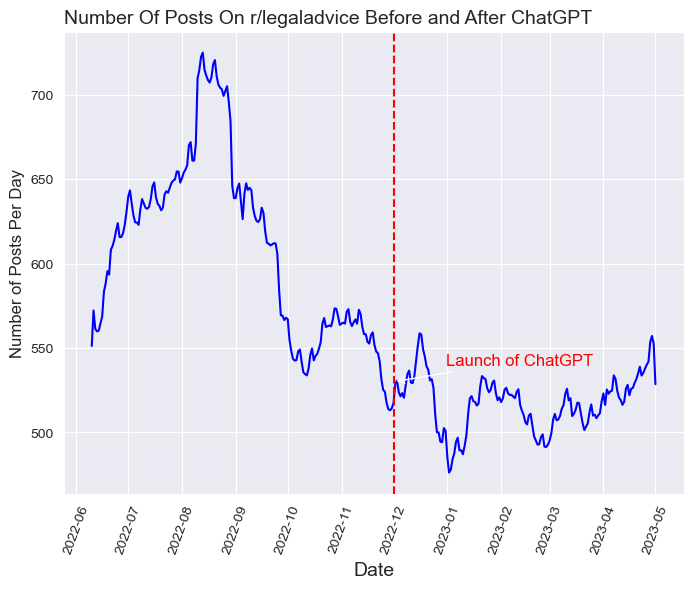

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

legaladvice_data = pd.read_csv(r'C:\Users\nbnav\OneDrive\Desktop\Dataquest\legaladvice2_posts.csv')
legaladvice_data['Created_at'] = pd.to_datetime(legaladvice_data['Created_at'], format='%d-%m-%Y %H:%M')
daily_counts = legaladvice_data.groupby(pd.Grouper(key='Created_at', freq='D')).size().reset_index(name='counts')

rolling_counts = daily_counts['counts'].rolling(window=20).mean()
rolling_data = pd.DataFrame({'Created_at': daily_counts['Created_at'], 'rolling_counts': rolling_counts})

sns.set_style('darkgrid')

fig, ax = plt.subplots(figsize=(8, 6))

sns.lineplot(x='Created_at', y='rolling_counts', data=rolling_data, ax=ax, color='blue')

# Set the y-axis limits

ax.set_title('Number Of Posts On r/legaladvice Before and After ChatGPT', loc='left', fontsize=14)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Number of Posts Per Day', fontsize =12)

plt.xticks(rotation=70)

date_str = '2022-12-01'
date = datetime.datetime.strptime(date_str, '%Y-%m-%d')
x_value = mdates.date2num(date)
ax.axvline(x=x_value, color='red', linestyle='--')


ax.annotate('Launch of ChatGPT', xy=(x_value, 530), xytext=(x_value + 30, 540),
            arrowprops=dict(facecolor='blue', arrowstyle='->'), color='red', fontsize=12)


plt.show()

# Conclusion

While the subreddits r/learnpython and r/excel shows clear detrimental effect from the launch of ChatGPT, r/statistics and r/legaladvice seems to be having less influence from ChatGPT in terms of engagement levels.

# Visualizing the time most posts are created

Since we already have the data, let's visulaize the time most posts are created on each subreddit to get a sense of when can we post the results of this analysis on reddit to maximize engagement.

# Visualizing for r/excel

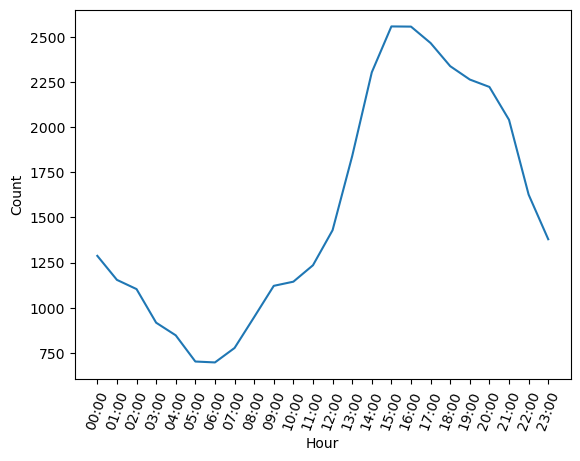

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

excel_time = pd.read_csv(r'C:\Users\nbnav\OneDrive\Desktop\Dataquest\excel_posts.csv')
excel_time['Created_at'] = pd.to_datetime(excel_time['Created_at'])
excel_time['hour'] = excel_time['Created_at'].dt.hour

counts = excel_time.groupby('hour')['hour'].count()


hour_labels = [f"{hour:02d}:00" for hour in counts.index]

plt.plot(hour_labels, counts.values)
plt.xlabel('Hour')
plt.ylabel('Count')

plt.xticks(rotation=70)
plt.show()

# Visualizing for r/learnpython

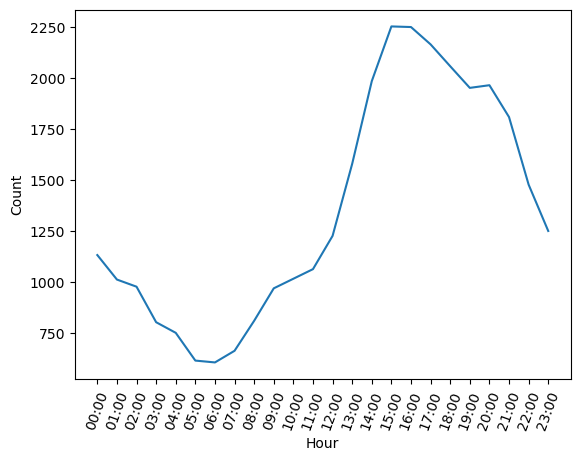

In [3]:
python_time = pd.read_csv(r'C:\Users\nbnav\OneDrive\Desktop\Dataquest\python_posts.csv')
python_time['Created_at'] = pd.to_datetime(python_time['Created_at'])
python_time['hour'] = excel_time['Created_at'].dt.hour

counts = python_time.groupby('hour')['hour'].count()


hour_labels = [f"{hour:02d}:00" for hour in counts.index]

plt.plot(hour_labels, counts.values)
plt.xlabel('Hour')
plt.ylabel('Count')

plt.xticks(rotation=70)
plt.show()

# Visualizing for r/legaladvice

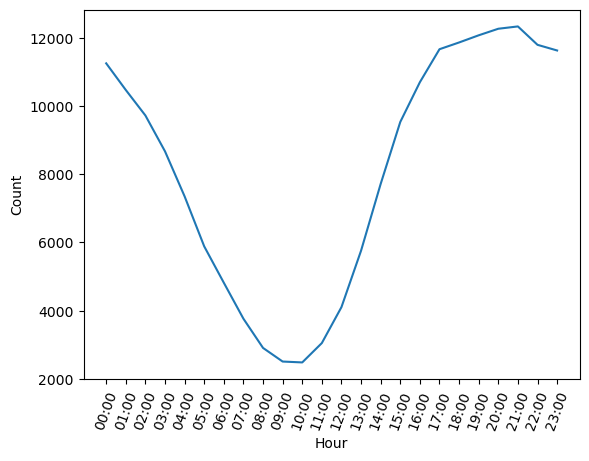

In [4]:
legal_time = pd.read_csv(r'C:\Users\nbnav\OneDrive\Desktop\Dataquest\legaladvice2_posts.csv')
legal_time['Created_at'] = pd.to_datetime(legal_time['Created_at'])
legal_time['hour'] = legal_time['Created_at'].dt.hour

counts = legal_time.groupby('hour')['hour'].count()


hour_labels = [f"{hour:02d}:00" for hour in counts.index]

plt.plot(hour_labels, counts.values)
plt.xlabel('Hour')
plt.ylabel('Count')

plt.xticks(rotation=70)
plt.show()

# Conclusion

Looks like the time between 14:00 UTC and 16:00 UTC to be the most attractive time to post on reddit which when converted to IST is between 19:30 and 21:30.